In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sweetviz as sw
import seaborn as sns
sns.set()

In [5]:
data=pd.read_csv('creditcard.csv')
data=data.drop(['Time'],axis=1)
data['Class']=data['Class'].map({1:-1,0:1})
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


In [6]:
from sklearn.model_selection import train_test_split
train,test,=train_test_split(data,test_size=(0.1),random_state=42)
train,val=train_test_split(train,test_size=(0.1),random_state=43)

In [7]:
train_normal=train[train['Class']==1].drop(['Class'],axis=1)
train_outlier=train[train['Class']==-1]

In [8]:
from sklearn.svm import OneClassSVM 
outlier_prop = len(train_outlier) / len(train_normal) 
svm = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.1) 
svm.fit(train_normal)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.0017108194130239385, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

[[   362     32]
 [ 20806 209493]]


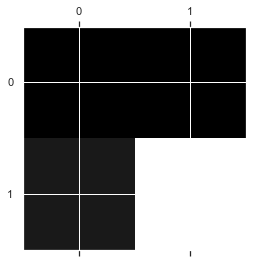

In [9]:
#train set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(train.iloc[:,-1],svm.predict(train.iloc[:,:-1]))
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)

[[   47     5]
 [ 4428 21153]]


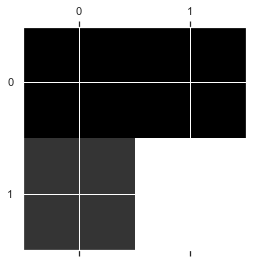

In [10]:
#validation set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(val.iloc[:,-1],svm.predict(val.iloc[:,:-1]))
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)

In [43]:
#validation set
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(val.iloc[:,-1],svm.predict(val.iloc[:,:-1])))
print(recall_score(val.iloc[:,-1],svm.predict(val.iloc[:,:-1])))
print(f1_score(val.iloc[:,-1],svm.predict(val.iloc[:,:-1])))

0.9983577712609971
0.9981236073648411
0.998240675580577


0.594298373271225


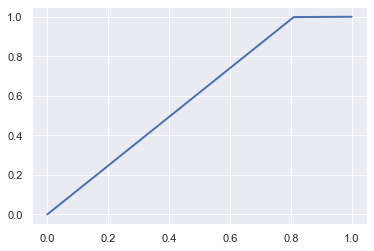

In [44]:
#train set
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(train.iloc[:,-1],svm.predict(train.iloc[:,:-1]))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,0],[1,1],'k--')
print(roc_auc_score(train.iloc[:,-1],svm.predict(train.iloc[:,:-1])))

0.5952156498362666


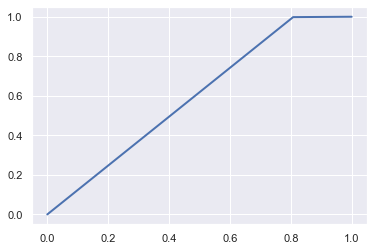

In [45]:
#validation set
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(val.iloc[:,-1],svm.predict(val.iloc[:,:-1]))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,0],[1,1],'k--')
print(roc_auc_score(val.iloc[:,-1],svm.predict(val.iloc[:,:-1])))